# Time Series Forecasting

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

(3020,)


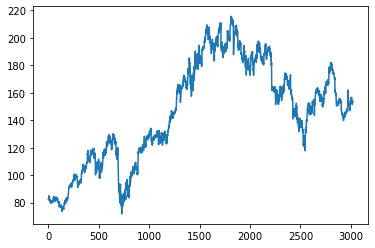

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data

dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', header=0, delimiter=',').to_numpy()
data = dataset[:,4]
print(data.shape)

plt.plot(data)
plt.show()

In [ ]:
# normalize data

#x_min = np.min(data)
#x_max = np.max(data)
#y_min = np.zeros(1)
#y_max = y_min + 1

#data_norm = (y_max - y_min) / (x_max - x_min) * (data - x_min)  + y_min
#print(data_norm.shape)

from sklearn.preprocessing import MinMaxScaler

data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)
print(data_norm.shape)

(3020, 1)


# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [ ]:
def create_datasets(data, window):
  x = []
  y = []

  for i in range(len(data)):
    if (i+window) >= len(data):
      break

    x_aux = []
    j = 0
    while(j < window):
      x_aux.append(data[i+j])
      j += 1
    
    x.append(x_aux)
    y.append(data[i+j])

  x = np.array(x)
  y = np.array(y)

  return x, y

window = 11
x, y = create_datasets(data_norm, window)
print(x.shape, y.shape)

(3009, 11, 1) (3009, 1)


In [ ]:
# train/test split

training_lenght = int(len(x) * (0.8))
x_train, x_test = x[:training_lenght], x[training_lenght:]
y_train, y_test = y[:training_lenght], y[training_lenght:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2407, 11, 1) (2407, 1) (602, 11, 1) (602, 1)


In [ ]:
# model

import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=window))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

model.compile(optimizer='adam', loss="mean_squared_error")

Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_412 (Dense)           (None, 32)                384       
                                                                 
 dense_413 (Dense)           (None, 16)                528       
                                                                 
 dense_414 (Dense)           (None, 8)                 136       
                                                                 
 dense_415 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, verbose=2)

Epoch 1/25
76/76 - 1s - loss: 0.0020 - val_loss: 6.0441e-04 - 893ms/epoch - 12ms/step
Epoch 2/25
76/76 - 0s - loss: 6.2859e-04 - val_loss: 4.5933e-04 - 223ms/epoch - 3ms/step
Epoch 3/25
76/76 - 0s - loss: 5.3382e-04 - val_loss: 4.4343e-04 - 227ms/epoch - 3ms/step
Epoch 4/25
76/76 - 0s - loss: 4.5913e-04 - val_loss: 3.2225e-04 - 209ms/epoch - 3ms/step
Epoch 5/25
76/76 - 0s - loss: 3.6423e-04 - val_loss: 3.0100e-04 - 230ms/epoch - 3ms/step
Epoch 6/25
76/76 - 0s - loss: 3.1432e-04 - val_loss: 2.3872e-04 - 236ms/epoch - 3ms/step
Epoch 7/25
76/76 - 0s - loss: 2.9624e-04 - val_loss: 2.1438e-04 - 221ms/epoch - 3ms/step
Epoch 8/25
76/76 - 0s - loss: 2.6816e-04 - val_loss: 2.8775e-04 - 221ms/epoch - 3ms/step
Epoch 9/25
76/76 - 0s - loss: 2.6883e-04 - val_loss: 2.0522e-04 - 201ms/epoch - 3ms/step
Epoch 10/25
76/76 - 0s - loss: 3.1401e-04 - val_loss: 2.4235e-04 - 244ms/epoch - 3ms/step
Epoch 11/25
76/76 - 0s - loss: 2.5729e-04 - val_loss: 2.2524e-04 - 177ms/epoch - 2ms/step
Epoch 12/25
76/76 - 0s

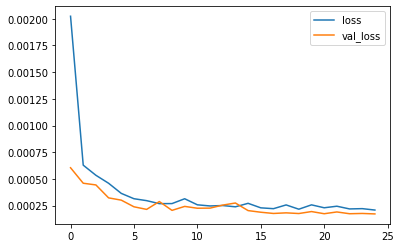

In [ ]:
def plot_loss_function(results):
  plt.plot(results.history['loss'], label='loss')
  plt.plot(results.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

plot_loss_function(results)

In [ ]:
# predictions

trainPredictFFNN = model.predict(x_train)
testPredictFFNN = model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


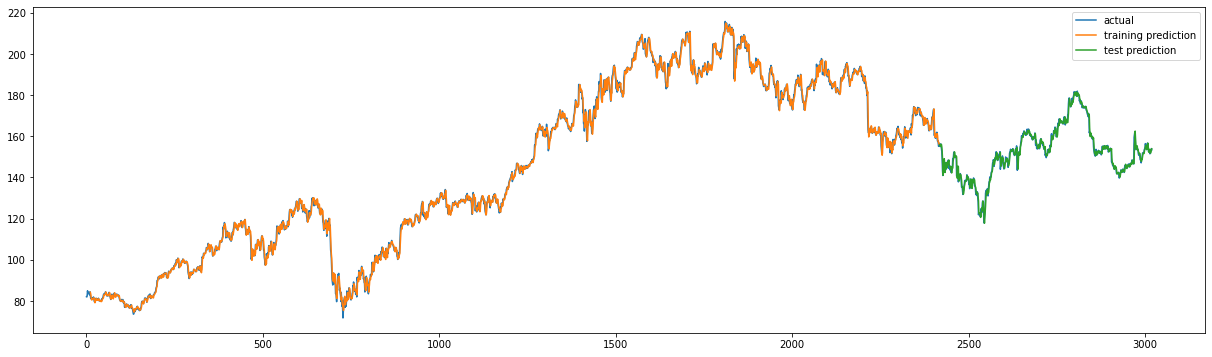

In [ ]:
# plot predictions

def plot_predictions(data, window, trainPredict, testPredict):
  trainPredictPlot = np.empty_like(data.reshape(len(data),1))
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[window:len(trainPredict)+window, :] = trainPredict
  trainPredictPlot = scaler.inverse_transform(trainPredictPlot)

  testPredictPlot = np.empty_like(data.reshape(len(data),1))
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+window:len(data), :] = testPredict
  testPredictPlot = scaler.inverse_transform(testPredictPlot)

  plt.figure(figsize=(21,6))
  plt.plot(data, label='actual')
  plt.plot(trainPredictPlot, label='training prediction')
  plt.plot(testPredictPlot, label='test prediction')
  plt.legend()
  plt.show()

  return trainPredictPlot, testPredictPlot

trainPredictPlot, testPredictPlot = plot_predictions(data, window, trainPredictFFNN, testPredictFFNN)

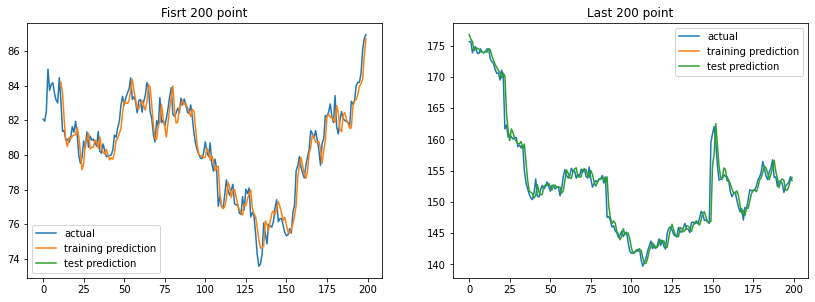

In [ ]:
# plot last and first n points predicted

def plot_first_last_npoints(data, trainPredictPlot, testPredictPlot, n):
  plt.figure(figsize=(14,30))
  plt.subplots_adjust(hspace=0.8)

  plt.subplot(421)
  plt.plot(data[0:n], label='actual')
  plt.plot(trainPredictPlot[0:n], label='training prediction')
  plt.plot(testPredictPlot[0:n], label='test prediction')
  plt.legend()
  title = "Fisrt " + str(n) + " point"
  plt.title(title)

  plt.subplot(422)
  plt.plot(data[-n:], label='actual')
  plt.plot(trainPredictPlot[-n:], label='training prediction')
  plt.plot(testPredictPlot[-n:], label='test prediction')
  plt.legend()
  title = "Last " + str(n) + " point"
  plt.title(title)

  plt.show()

plot_first_last_npoints(data, trainPredictPlot, testPredictPlot, 200)

## Subtask 3

Perform prediction by using RNN

In [ ]:
# model

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(input_shape=(window, 1)))
model2.add(tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True))
model2.add(tf.keras.layers.SimpleRNN(16, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='linear'))

model2.summary()

model2.compile(optimizer='adam', loss="mean_squared_error")

Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_112 (SimpleRNN)  (None, 11, 32)            1088      
                                                                 
 simple_rnn_113 (SimpleRNN)  (None, 16)                784       
                                                                 
 dense_416 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=2)

Epoch 1/50
76/76 - 3s - loss: 0.0232 - val_loss: 2.1423e-04 - 3s/epoch - 35ms/step
Epoch 2/50
76/76 - 1s - loss: 2.9059e-04 - val_loss: 3.1136e-04 - 559ms/epoch - 7ms/step
Epoch 3/50
76/76 - 1s - loss: 3.7341e-04 - val_loss: 6.7701e-04 - 572ms/epoch - 8ms/step
Epoch 4/50
76/76 - 1s - loss: 3.7710e-04 - val_loss: 2.1169e-04 - 561ms/epoch - 7ms/step
Epoch 5/50
76/76 - 1s - loss: 2.6240e-04 - val_loss: 2.3075e-04 - 570ms/epoch - 7ms/step
Epoch 6/50
76/76 - 1s - loss: 2.5108e-04 - val_loss: 1.9352e-04 - 580ms/epoch - 8ms/step
Epoch 7/50
76/76 - 1s - loss: 2.3860e-04 - val_loss: 2.2065e-04 - 581ms/epoch - 8ms/step
Epoch 8/50
76/76 - 1s - loss: 2.5868e-04 - val_loss: 2.0538e-04 - 828ms/epoch - 11ms/step
Epoch 9/50
76/76 - 1s - loss: 2.4065e-04 - val_loss: 1.8316e-04 - 907ms/epoch - 12ms/step
Epoch 10/50
76/76 - 1s - loss: 2.4018e-04 - val_loss: 2.4372e-04 - 925ms/epoch - 12ms/step
Epoch 11/50
76/76 - 1s - loss: 2.1585e-04 - val_loss: 1.8610e-04 - 560ms/epoch - 7ms/step
Epoch 12/50
76/76 - 1s

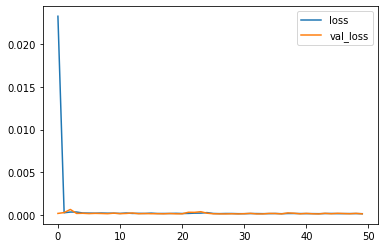

In [ ]:
plot_loss_function(results2)

In [ ]:
# predictions

trainPredictRNN = model2.predict(x_train)
testPredictRNN = model2.predict(x_test)

19/19 [==============================] - 0s 4ms/step


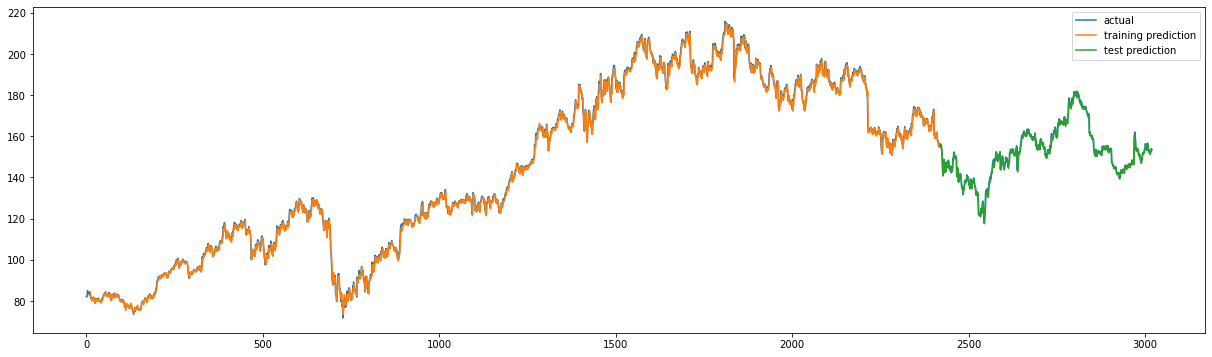

In [ ]:
# plot predictions

trainPredictPlot, testPredictPlot = plot_predictions(data, window, trainPredictRNN, testPredictRNN)

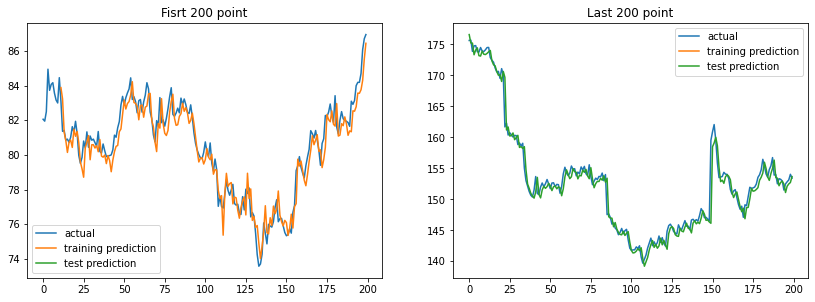

In [ ]:
# plot last and first n points predicted

plot_first_last_npoints(data, trainPredictPlot, testPredictPlot, 200)

## Subtask 4

Perform prediction by using LSTM

In [ ]:
# model

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.InputLayer(input_shape=(window, 1)))
model3.add(tf.keras.layers.LSTM(16, activation='tanh', return_sequences=True))
model3.add(tf.keras.layers.LSTM(8, activation='tanh'))
model3.add(tf.keras.layers.Dense(1, activation='linear'))

model3.summary()

model3.compile(optimizer='adam', loss="mean_squared_error")

Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_110 (LSTM)             (None, 11, 16)            1152      
                                                                 
 lstm_111 (LSTM)             (None, 8)                 800       
                                                                 
 dense_417 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, verbose=2)

Epoch 1/100
151/151 - 8s - loss: 0.0545 - val_loss: 8.2960e-04 - 8s/epoch - 54ms/step
Epoch 2/100
151/151 - 2s - loss: 0.0012 - val_loss: 7.7284e-04 - 2s/epoch - 11ms/step
Epoch 3/100
151/151 - 2s - loss: 0.0010 - val_loss: 7.6371e-04 - 2s/epoch - 12ms/step
Epoch 4/100
151/151 - 2s - loss: 9.5651e-04 - val_loss: 8.4075e-04 - 2s/epoch - 11ms/step
Epoch 5/100
151/151 - 2s - loss: 9.2831e-04 - val_loss: 7.1914e-04 - 2s/epoch - 11ms/step
Epoch 6/100
151/151 - 2s - loss: 9.0441e-04 - val_loss: 7.8513e-04 - 2s/epoch - 11ms/step
Epoch 7/100
151/151 - 2s - loss: 8.6816e-04 - val_loss: 7.0067e-04 - 2s/epoch - 12ms/step
Epoch 8/100
151/151 - 2s - loss: 8.5294e-04 - val_loss: 8.3800e-04 - 2s/epoch - 12ms/step
Epoch 9/100
151/151 - 2s - loss: 8.3607e-04 - val_loss: 6.5018e-04 - 2s/epoch - 12ms/step
Epoch 10/100
151/151 - 2s - loss: 7.8493e-04 - val_loss: 7.9431e-04 - 2s/epoch - 12ms/step
Epoch 11/100
151/151 - 2s - loss: 7.7779e-04 - val_loss: 6.8533e-04 - 2s/epoch - 12ms/step
Epoch 12/100
151/151

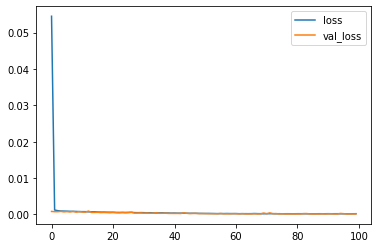

In [ ]:
plot_loss_function(results3)

In [ ]:
# predictions

trainPredictLSTM = model3.predict(x_train)
testPredictLSTM = model3.predict(x_test)

19/19 [==============================] - 0s 4ms/step


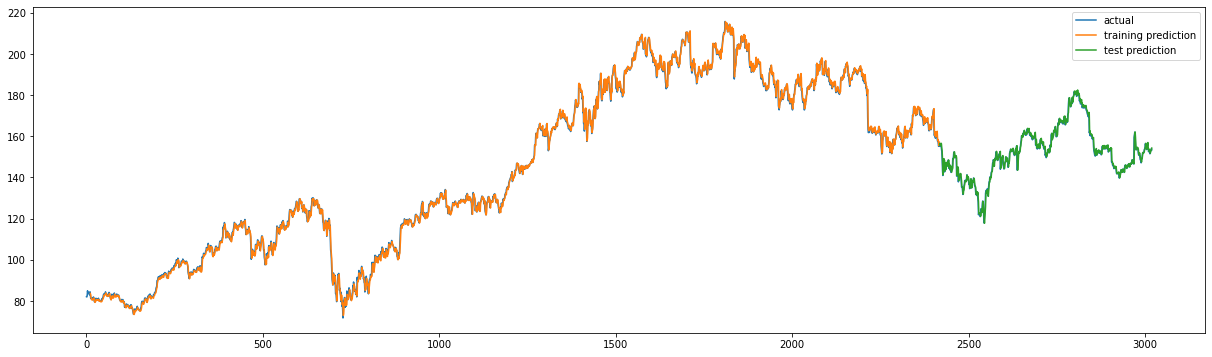

In [ ]:
# plot predictions

trainPredictPlot, testPredictPlot = plot_predictions(data, window, trainPredictLSTM, testPredictLSTM)

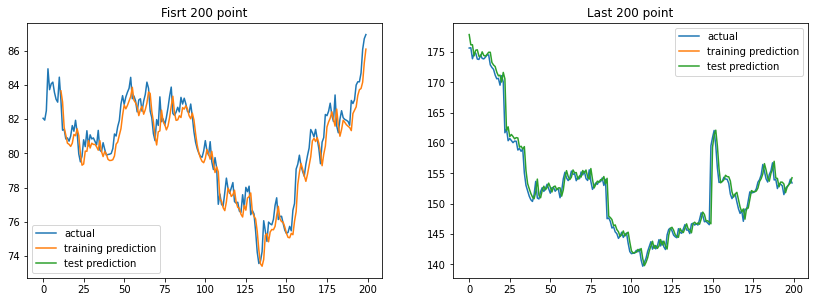

In [ ]:
# plot last and first n points predicted

plot_first_last_npoints(data, trainPredictPlot, testPredictPlot, 200)

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

trainPredictFFNN = scaler.inverse_transform(trainPredictFFNN)
testPredictFFNN = scaler.inverse_transform(testPredictFFNN)

mse_train = mean_squared_error(y_train, trainPredictFFNN)
mse_test = mean_squared_error(y_test, testPredictFFNN)

print('Feed-Forward neural network model')
print('Train MSE: %.3f' % (mse_train))
print('Test MSE: %.3f' % (mse_test))
print()

trainPredictRNN = scaler.inverse_transform(trainPredictRNN)
testPredictRNN = scaler.inverse_transform(testPredictRNN)

mse_train = mean_squared_error(y_train, trainPredictRNN)
mse_test = mean_squared_error(y_test, testPredictRNN)

print('RNN model')
print('Train MSE: %.3f' % (mse_train))
print('Test MSE: %.3f' % (mse_test))
print()

trainPredictLSTM = scaler.inverse_transform(trainPredictLSTM)
testPredictLSTM = scaler.inverse_transform(testPredictLSTM)

mse_train = mean_squared_error(y_train, trainPredictLSTM)
mse_test = mean_squared_error(y_test, testPredictLSTM)

print('LSTM model')
print('Train MSE: %.3f' % (mse_train))
print('Test MSE: %.3f' % (mse_test))

Feed-Forward neural network model
Train MSE: 4.063
Test MSE: 3.569

RNN model
Train MSE: 3.774
Test MSE: 3.394

LSTM model
Train MSE: 3.695
Test MSE: 3.261


The best architecture is the LSTM model, since the MSE metric is lower in comparison with feed-forward neural network and recurrent neural network models. Furthermore the LSTM model uses less neurons in its architecture.